In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the dataset

In [4]:
df_train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
df_test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
df_greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

In [5]:
df_y = df_train['Class']
df_train.drop(['Id',],inplace=True,axis=1)

df_test.drop(['Id',],inplace=True,axis=1)

# Exploratory analysis

In [6]:
df_train.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [7]:
df_nulls = df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

## Some graphs of distribution

/tmp/ipykernel_32/1763562691.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_train, x='AB', hue='Class', shade=True)


Text(0.5, 1.0, 'Distribution of AB, by Class')

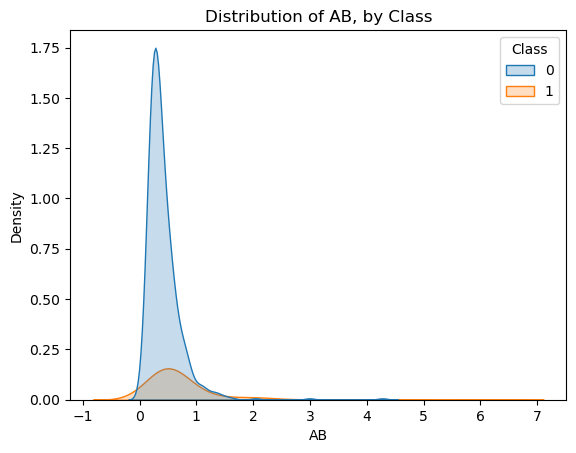

In [8]:
sns.kdeplot(data=df_train, x='AB', hue='Class', shade=True)

# Add title
plt.title("Distribution of AB, by Class")


/tmp/ipykernel_32/742542905.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_train, x='BQ', hue='Class', shade=True)


Text(0.5, 1.0, 'Distribution of BQ, by Class')

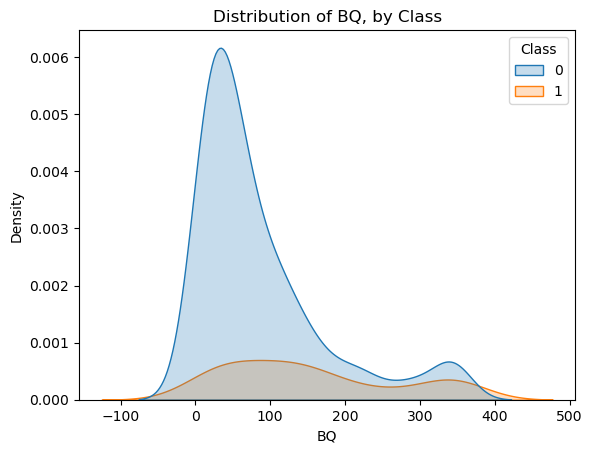

In [9]:
sns.kdeplot(data=df_train, x='BQ', hue='Class', shade=True)

# Add title
plt.title("Distribution of BQ, by Class")


/tmp/ipykernel_32/1102971842.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_train, x='GF', hue='Class', shade=True)


Text(0.5, 1.0, 'Distribution of GF, by Class')

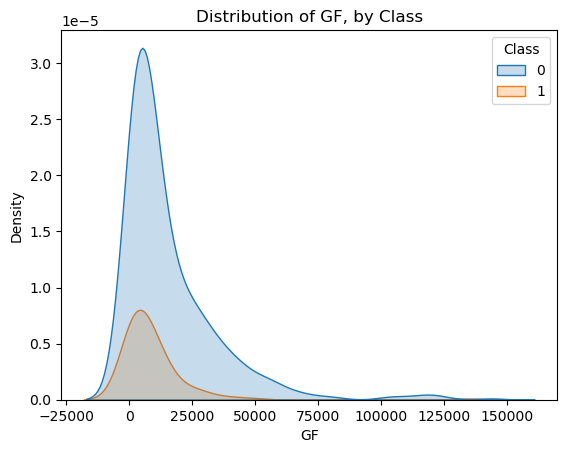

In [10]:
sns.kdeplot(data=df_train, x='GF', hue='Class', shade=True)

# Add title
plt.title("Distribution of GF, by Class")


<Axes: xlabel='Class', ylabel='Count'>

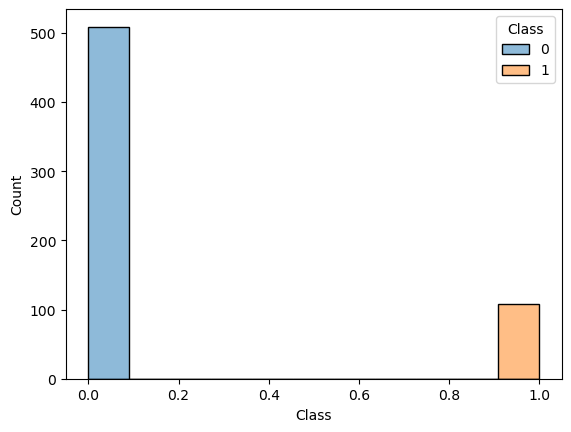

In [11]:
sns.histplot(data=df_train, x='Class', hue='Class')

### Conclusion

From the previous output it is shown that the target data is imbalanced. It can be seen clearly from the histogram of the feature "class". 

# Handling Null values

it's gonna be used iterative Imputer to fill the Null values. Before that it is needed that all columns are numerical

### One Hot Enconding columns

In [12]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

### Using iterative Imputer

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0)
# For the training data
df_train_imputed = imputer.fit_transform(df_train)
df_train = pd.DataFrame(df_train_imputed,columns= df_train.columns)
# For the test data
df_test_imputed = imputer.fit_transform(df_test)
df_test = pd.DataFrame(df_test_imputed,columns= df_test.columns)

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      617 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      617 non-null    float64
 16  CC      617 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

# Solving Imbalanced Class

To solve this problem hee it's going to be used the SMOTE library. This library creates synthetich data to balanced the class

Here we only fit the model for the training data thus this data contains the imbalanced class we want to predict and the test data doesn´t

In [15]:
# Here we don't fit the model 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
df_train, df_y = sm.fit_resample(df_train, df_y)


In [16]:
df_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,0.209377,3109.033290,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.587310,...,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0,0.000000,1.000000
1,0.145282,978.764160,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.928240,...,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0,1.000000,0.000000
2,0.470030,2635.106540,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.780240,...,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0,0.000000,1.000000
3,0.252107,3819.651770,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.677380,...,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0,0.000000,1.000000
4,0.380297,3733.048440,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.734120,...,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1.155454,7765.902089,156.691365,83.583142,11.159233,6.858764,0.025578,12.591016,19.815860,5103.215400,...,0.897227,13.136824,72.611063,4389.532908,41.622466,42.833882,0.071657,1.0,0.000000,1.000000
1014,0.260561,3093.427667,85.200147,24.675984,8.138688,4.059334,0.041651,9.338525,4.116623,6089.906010,...,0.206000,31.195220,76.178279,2502.988473,30.941968,52.579150,0.057795,1.0,0.000000,1.000000
1015,0.391405,6093.417069,87.534600,9.483440,13.086727,5.153700,0.025578,10.406561,8.605429,4872.719433,...,0.258848,25.831978,72.611063,863.913409,44.057603,100.876777,9.355305,1.0,0.424131,0.575869
1016,0.187646,1723.052159,85.200147,21.316690,8.138688,4.383563,0.095406,10.052318,6.607484,4243.785982,...,0.118395,14.500989,127.090200,12714.526357,25.397064,27.275212,16.199131,1.0,0.736444,0.263556


<Axes: xlabel='Class', ylabel='Count'>

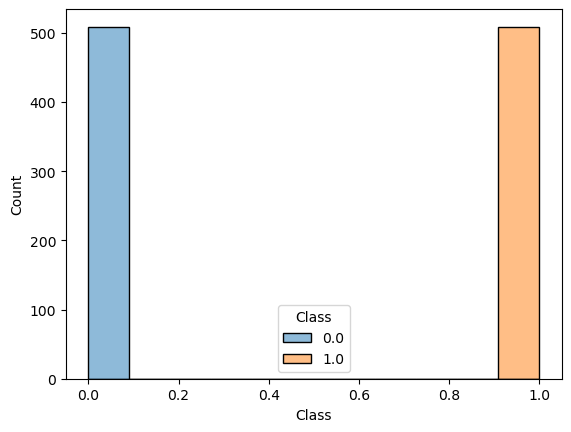

In [17]:
sns.histplot(data=df_train, x='Class', hue='Class')

# Getting rid of Outliers

Let's see the boxplots of the features

<Axes: xlabel='AB'>

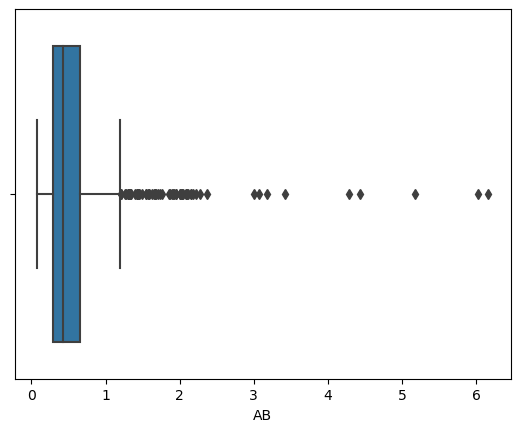

In [18]:
import seaborn as sns
sns.boxplot(data=df_train, x='AB')

<Axes: xlabel='GF'>

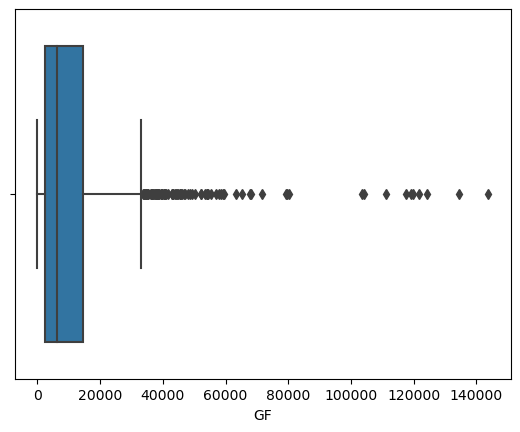

In [19]:
sns.boxplot(data=df_train, x='GF')


We can see clearly from the boxplot possible outliers. All features in dataset are anonymized so detecting outlier it's more dificult, because we can't determinate a range for a determinated feature. By now we are considering that outliers are correct, this may change according the score of the classifiers

# Feature selection


The propouse here is to detected the best posible features for the classification model

In [20]:
from numpy import array
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df_y = df_train['Class']
df_train.drop(['Class'],inplace=True,axis=1)

selection = SelectKBest(f_classif, k=18)
z = selection.fit_transform(df_train, df_y)
selected_features_mask = selection.get_support()
selected_features = df_train.columns[selected_features_mask].tolist()
print(selected_features)

['AB', 'AF', 'AM', 'BN', 'BQ', 'CD ', 'CR', 'DA', 'DH', 'DI', 'DL', 'DU', 'FE', 'FL', 'GF', 'GL', 'EJ_A', 'EJ_B']


Text(0.5, 1.0, 'Correlation between Variables in ICR dataframe')

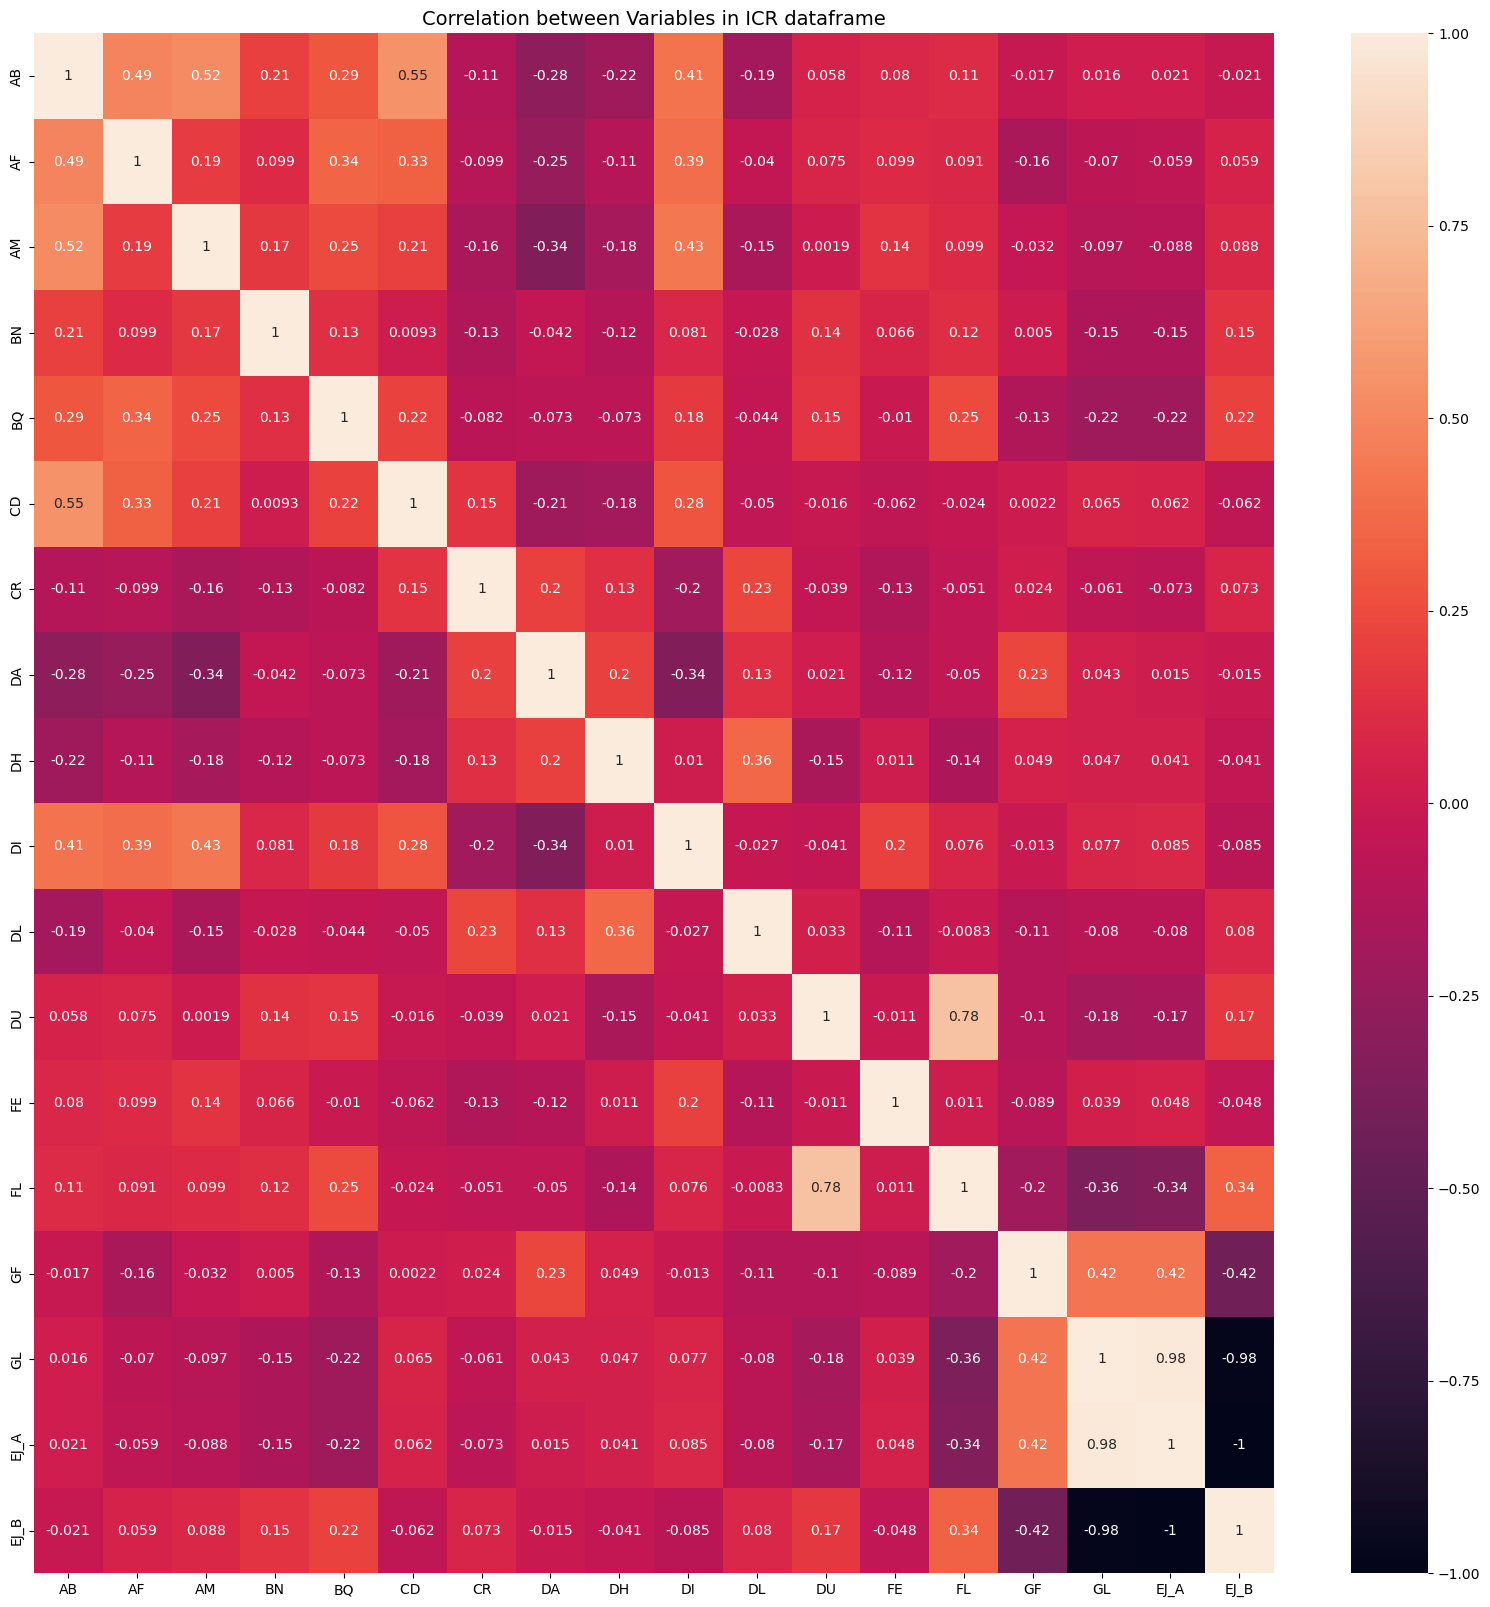

In [21]:
plt.figure(figsize=(20,20))
correlation = df_train[np.array(selected_features)].corr()
sns.heatmap(correlation,annot=True, fmt='.2g')
plt.title('Correlation between Variables in ICR dataframe', fontsize=14)

From the correlation matrix it's gonna be dropped the next features: 'GL','EJ_A','DU'

In [22]:
df_train.drop(columns=['GL','EJ_A','DU'],inplace= True)
df_test.drop(columns=['GL','EJ_A','DU'],inplace= True)

In [23]:
selected_features = list(set(selected_features).difference(['GL','EJ_A','DU']))
selected_features

['CR',
 'AB',
 'BN',
 'AF',
 'DH',
 'DI',
 'FE',
 'BQ',
 'DA',
 'AM',
 'FL',
 'EJ_B',
 'DL',
 'CD ',
 'GF']

### New correlation matrix

Text(0.5, 1.0, 'Correlation between Selected Variables in ICR dataframe')

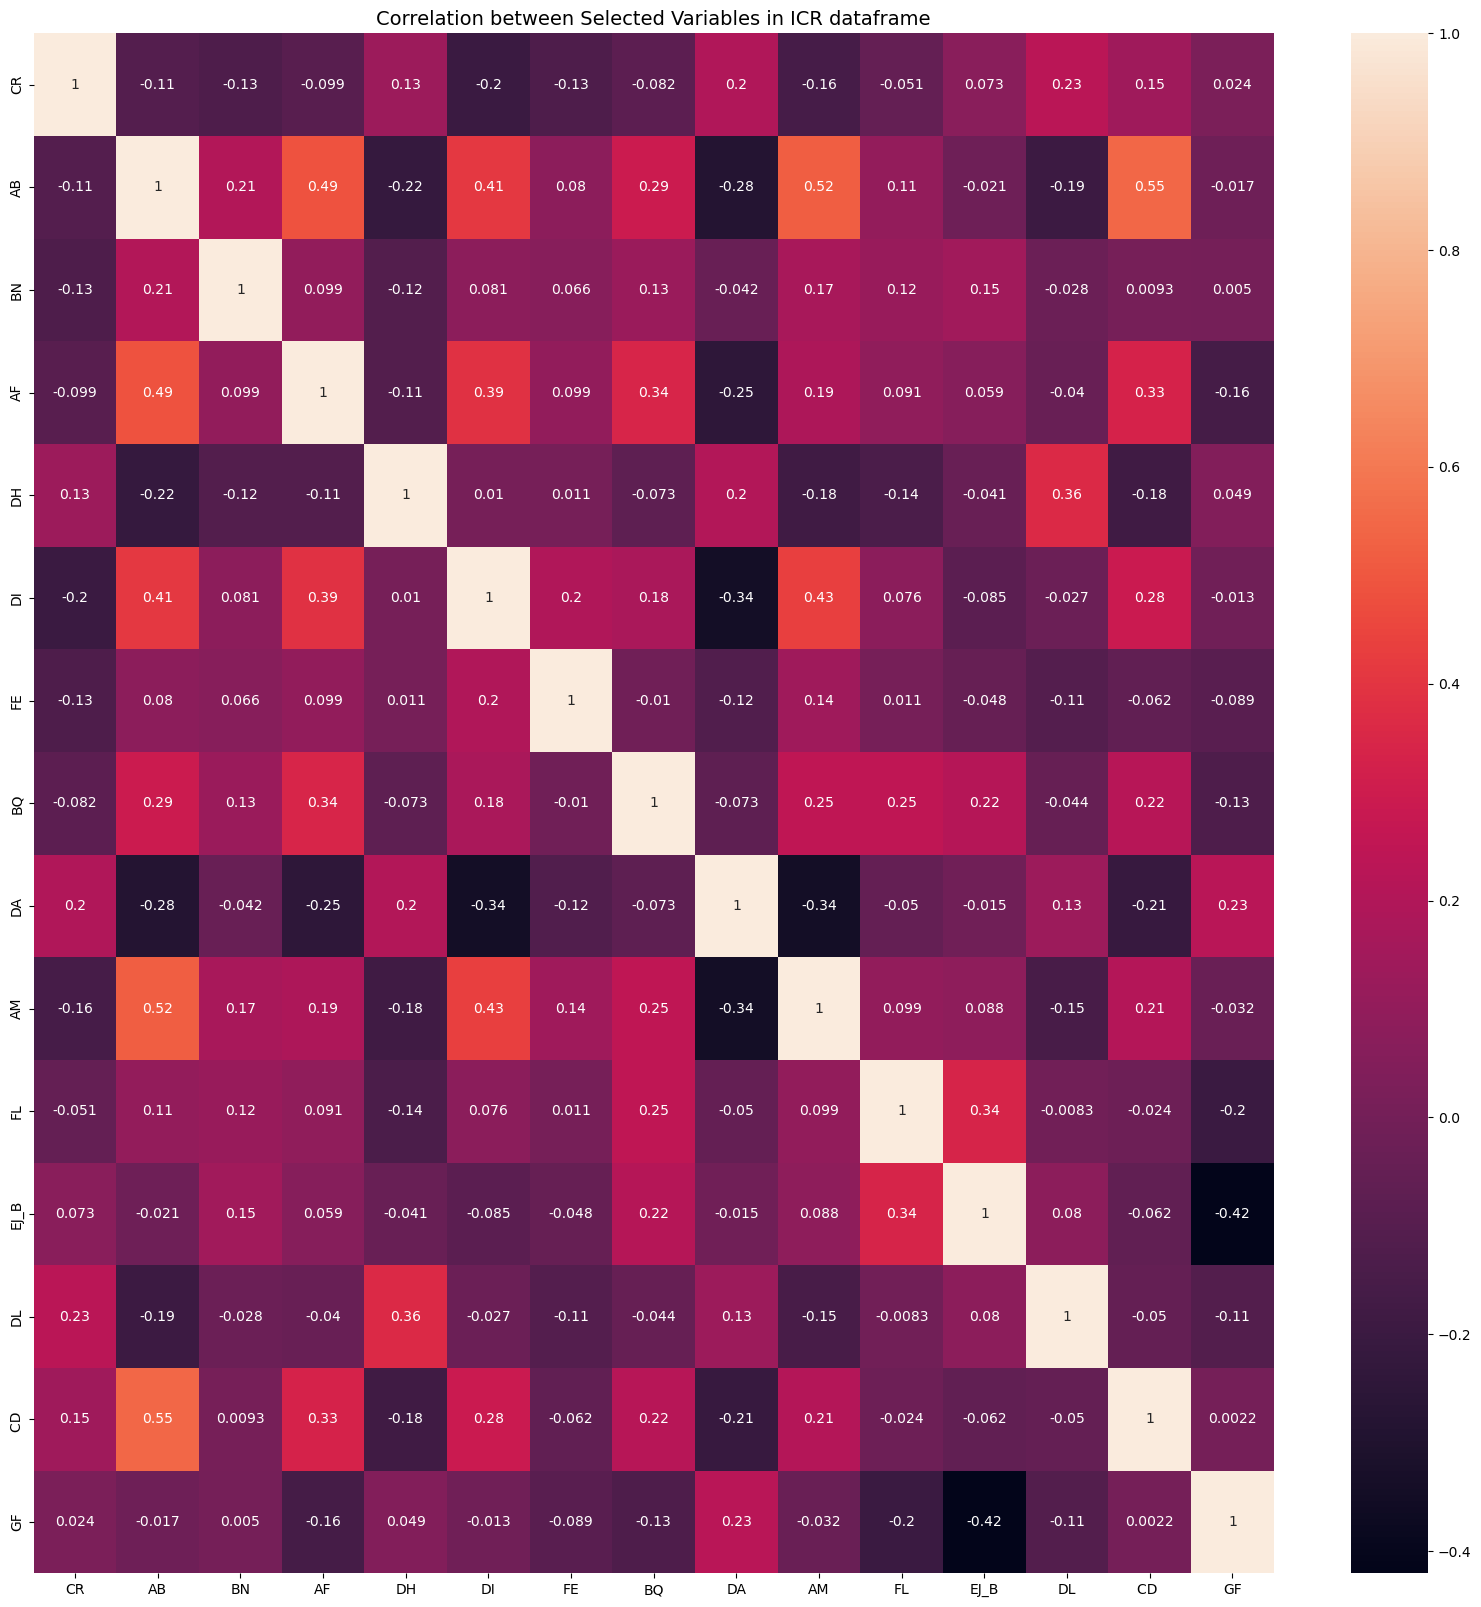

In [24]:
plt.figure(figsize=(20,20))
correlation = df_train[np.array(selected_features)].corr()
sns.heatmap(correlation,annot=True, fmt='.2g')
plt.title('Correlation between Selected Variables in ICR dataframe', fontsize=14)

# Training the model

For this notebook it's going to be used these models:

- Logistic regression
- SVM for classification (SVC)
- CatBoostClassifier
- Random Forest Classifier
- AdaBoostClassifier
- GradienBoostingClassifier

### Separating the data into training and test

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_y, test_size=0.3, random_state=2)

### Dummy Classifier

In [26]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
print("Score in train set:",dummy_clf.score(X_train, y_train))
print("Score in test set:",dummy_clf.score(X_test, y_test))

Score in train set: 0.5070224719101124
Score in test set: 0.48366013071895425


In [27]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Assuming you have already defined your model (e.g., model = YourModel()), X, and y


### Logistic Regression

In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0,max_iter=100).fit(X_train, y_train)
scores = cross_val_score(logistic,df_train,df_y,cv=10)
print(scores)
scores.mean()

train_score = logistic.score(X_train, y_train)
test_score = logistic.score(X_test, y_test)

print('the train scores is',train_score)
print('the test scores is',test_score)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.76470588 0.81372549 0.8627451  0.84313725 0.75490196 0.73529412
 0.70588235 0.71568627 0.85148515 0.78217822]
the train scores is 0.797752808988764
the test scores is 0.7777777777777778


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### 

### Gradient Boosting Classifer

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=150, learning_rate=1.0,max_depth=1, random_state=1).fit(X_train, y_train)
scores = cross_val_score(GBC, df_train, df_y, cv=10)
print('the scores for CV are:',scores)
print('the mean for all these score are:',scores.mean())

train_score = GBC.score(X_train, y_train)
test_score = GBC.score(X_test, y_test)

print('the train scores is',train_score)
print('the test scores is',test_score)


the scores for CV are: [0.91176471 0.8627451  0.95098039 0.93137255 0.96078431 0.93137255
 0.97058824 0.97058824 0.93069307 0.97029703]
the mean for all these score are: 0.9391186177441273
the train scores is 1.0
the test scores is 0.9248366013071896


### RandomForestClasiffier

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

scores = cross_val_score(clf, df_train, df_y, cv=10)
print('the scores for CV are:',scores)
print('the mean for all these score are:',scores.mean())

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print('the train scores is',train_score)
print('the test scores is',test_score)


the scores for CV are: [0.88235294 0.84313725 0.91176471 0.89215686 0.95098039 0.91176471
 0.88235294 0.91176471 0.91089109 0.88118812]
the mean for all these score are: 0.8978353717724714
the train scores is 0.9143258426966292
the test scores is 0.9019607843137255


# Woring on the choosen model

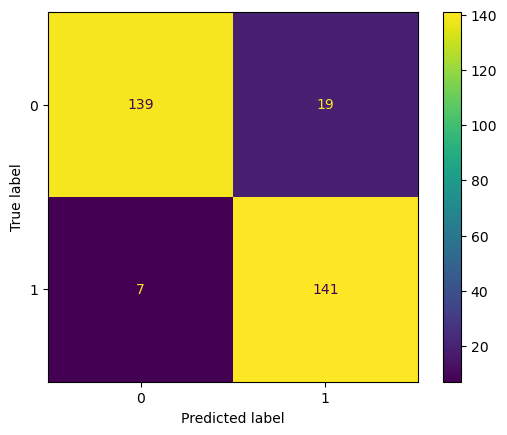

              precision    recall  f1-score   support

     class 0       0.95      0.88      0.91       158
     class 1       0.88      0.95      0.92       148

    accuracy                           0.92       306
   macro avg       0.92      0.92      0.92       306
weighted avg       0.92      0.92      0.92       306



In [40]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report
y_pred = GBC.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))


### Validation Curve

In [46]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(-4,1,6)
train_scores,test_scores = validation_curve(GBC,X_train,y_train,param_name="learning_rate",param_range=param_range,cv=5)
print(param_range)

[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [44]:
training_scores_arr = []
test_scores_arr = []
for i in train_scores:
    training_scores_arr.append(i.mean())
for i in test_scores:
    test_scores_arr.append(i.mean())


print(training_scores_arr)    
print(test_scores_arr) 
print(param_range)        


[0.5070224771066506, 0.7387697715289983, 0.8367329571732494, 0.9427694015354732, 1.0, 0.2893306200474825]
[0.5070225549098788, 0.7232049640500344, 0.8299517384024426, 0.8946222791293212, 0.9340293509307594, 0.29080074854722743]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]


In [48]:
param_range = [i for i in range(1,20)]
train_scores,test_scores = validation_curve(GBC,X_train,y_train,param_name="max_depth",param_range=param_range,cv=5)
training_scores_arr = []
test_scores_arr = []
for i in train_scores:
    training_scores_arr.append(i.mean())
for i in test_scores:
    test_scores_arr.append(i.mean())


print(training_scores_arr)    
print(test_scores_arr) 
print(param_range)        


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9340293509307594, 0.9410223579237664, 0.9494336649266225, 0.9536590170392987, 0.9592829705505762, 0.9466561607406676, 0.9494336649266227, 0.9367871565054664, 0.912922288978627, 0.8975770708165076, 0.8736531074559244, 0.8539150989855215, 0.8609573525066484, 0.863774253915099, 0.863774253915099, 0.863774253915099, 0.863774253915099, 0.863774253915099, 0.863774253915099]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [49]:
param_range = [i for i in range(50,200)]
train_scores,test_scores = validation_curve(GBC,X_train,y_train,param_name="n_estimators",param_range=param_range,cv=5)
training_scores_arr = []
test_scores_arr = []
for i in train_scores:
    training_scores_arr.append(i.mean())
for i in test_scores:
    test_scores_arr.append(i.mean())


print(training_scores_arr)    
print(test_scores_arr) 

KeyboardInterrupt: 

# GridSearch

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [i for i in range(90,120,5)],  # Different values for the regularization parameter C
    'learning_rate': [0,80,0.85,0.90, 0.93, 0.96,1],
    'max_depth': [5,6,7,8,9]
    # Different values for the kernel coefficient gamma
}


grid_search = GridSearchCV(GBC, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:")
print(grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best hyperparameters:
{'learning_rate': 0.9, 'max_depth': 7, 'n_estimators': 90}
Best cross-validation score: 0.9620801733477791


In [60]:
l = [i for i in range(100,150,10)]
l

[100, 110, 120, 130, 140]

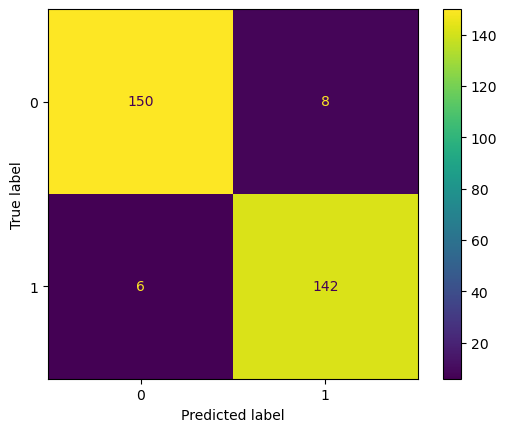

              precision    recall  f1-score   support

     class 0       0.96      0.95      0.96       158
     class 1       0.95      0.96      0.95       148

    accuracy                           0.95       306
   macro avg       0.95      0.95      0.95       306
weighted avg       0.95      0.95      0.95       306



In [64]:

y_pred = grid_search.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])
cm_display.plot()
plt.show()
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
